# Topo - VTK 4x4 transform matrix from control points
O. Kaufmann, 2021.

In [1]:
from ipywidgets import TwoByTwoLayout
import bootsoff.topo.geometry as btg
import pyvista as pv
import numpy as np

## Coordinates of the control points in the origin space 
at least 4 non co-planar points are required, if more than 4 are given, a least-squares approach is used

In [2]:
p0 = np.array([0., 0., 0.])
p1 = np.array([0., 4., 0.])
p2 = np.array([1., 0., 0.])
p3 = np.array([0., 0., 2.])

In [3]:
origin_points = [p0, p1, p2, p3]

## Corresponding coordinates of the control points in the destination space 

In [4]:
P0 = np.array([2., 0., 0.])
P1 = np.array([2., 0., 1.])
P2 = np.array([3., 0., 0.])
P3 = np.array([2., -4., 3.])

In [5]:
destination_points = [P0, P1, P2, P3]

## Convert control points to vtk objects

In [6]:
origin = pv.PolyData(origin_points)
origin['Labels'] = [f'p{i}' for i in range(4)]
destination = pv.PolyData(destination_points)
destination['Labels'] = [f'P{i}' for i in range(4)]

2021-10-03 19:03:20.624 (   0.205s) [        99D48740]vtkDataSetAttributes.cx:1285  WARN| vtkPointData (0x5586cc42cb40): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.
2021-10-03 19:03:20.625 (   0.206s) [        99D48740]vtkDataSetAttributes.cx:1285  WARN| vtkPointData (0x5586cc58c6e0): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.


## Create plotters for the origin and destination spaces

In [7]:
origin_plotter = pv.Plotter()
origin_plotter.add_point_labels(origin, 'Labels', point_size=12, font_size=12, point_color='green')
#origin_plotter.add_points(origin, point_size=12, color='green')
origin_plotter.add_axes_at_origin(labels_off=True)
origin_plotter.camera_position = 'iso'
# origin_plotter.show_grid()
origin_scene = origin_plotter.show(jupyter_backend='ipyvtklink', return_viewer=True)

In [8]:
destination_plotter = pv.Plotter()
destination_plotter.add_point_labels(destination, 'Labels', point_size=12, font_size=12, point_color='orange')
destination_plotter.add_axes_at_origin(labels_off=True)
destination_plotter.camera_position = 'iso'
# destination_plotter.show_grid()
destination_scene = destination_plotter.show(jupyter_backend='ipyvtklink', return_viewer=True)

## Compute the 4x4 transform matrix

In [9]:
transform_matrix, _ = btg.vtk_transform_matrix_from_control_points(origin_points, destination_points)

## Use the 4x4 transform to transform origin points into destination points

In [10]:
origin_copy = origin.copy()

2021-10-03 19:03:21.102 (   0.683s) [        99D48740]vtkDataSetAttributes.cx:1285  WARN| vtkPointData (0x5586cc42cb40): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.


In [11]:
origin_copy.clear_arrays() # must remove field before applying transform
transformed = origin_copy.transform(transform_matrix)

In [12]:
transformed['Labels'] = [f'P{i}' for i in range(4)]

2021-10-03 19:03:21.115 (   0.696s) [        99D48740]vtkDataSetAttributes.cx:1285  WARN| vtkPointData (0x5586cd4fd720): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.


In [13]:
transformed

2021-10-03 19:03:21.122 (   0.703s) [        99D48740]vtkDataSetAttributes.cx:1285  WARN| vtkPointData (0x5586cd4fd720): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.


PolyData (0x7f2c0c148dc0)
  N Cells:	4
  N Points:	4
  X Bounds:	2.000e+00, 3.000e+00
  Y Bounds:	-4.000e+00, 1.449e-16
  Z Bounds:	-3.886e-16, 3.000e+00
  N Arrays:	1

## Create a plotter for transformed points and display origin (top left), destination (top right) end transformed (bottom right) control points

In [14]:
transformed_plotter = pv.Plotter()
transformed_plotter.add_point_labels(transformed, 'Labels', point_size=12, font_size=12, point_color='red')
#transformed_plotter.add_points(transformed, point_size=12, color='green')
transformed_plotter.add_axes_at_origin(labels_off=True)
transformed_plotter.camera_position = 'iso'
#transformed_plotter.show_grid()
transformed_scene = transformed_plotter.show(jupyter_backend='ipyvtklink', return_viewer=True)

In [15]:
TwoByTwoLayout(top_left=origin_scene, top_right=destination_scene, bottom_right=transformed_scene)

TwoByTwoLayout(children=(ViewInteractiveWidget(height=768, layout=Layout(grid_area='top-left', height='auto', …

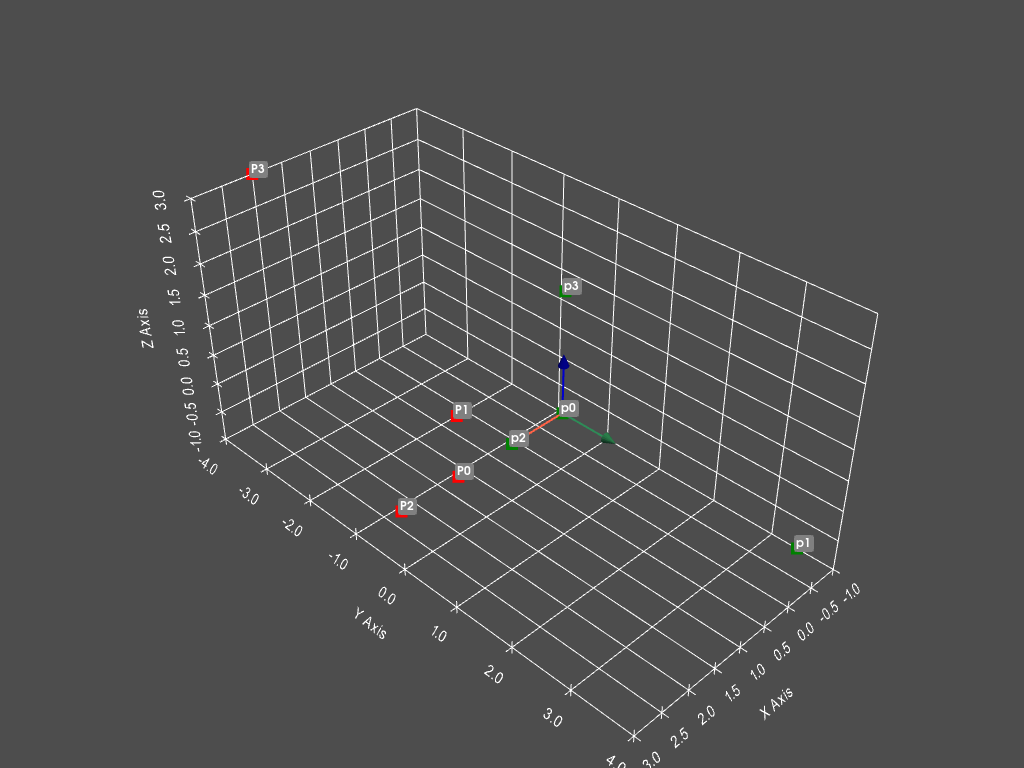

In [16]:
static_plotter = pv.Plotter()
static_plotter.add_point_labels(transformed, 'Labels', point_size=12, font_size=12, point_color='red')
static_plotter.add_point_labels(origin, 'Labels', point_size=12, font_size=12, point_color='green')
static_plotter.add_axes_at_origin(labels_off=True)
static_plotter.camera_position = 'iso'
static_plotter.show_grid()
static_plotter.show(jupyter_backend='static')

In [17]:
[transformed.cell_points(i) for i in range(transformed.n_cells)]

[array([[ 2.00000000e+00, -1.69891899e-16, -3.88578059e-16]]),
 array([[ 2.00000000e+00, -1.05807032e-15,  1.00000000e+00]]),
 array([[ 3.00000000e+00,  1.44942688e-16, -2.61544505e-16]]),
 array([[ 2., -4.,  3.]])]

In [18]:
[destination.cell_points(i) for i in range(destination.n_cells)]

[array([[2., 0., 0.]]),
 array([[2., 0., 1.]]),
 array([[3., 0., 0.]]),
 array([[ 2., -4.,  3.]])]